# Machine, Data and Learning: Assignment 1 

Assignment 1: Question 2

**Animesh Sinha (2018113001)**

**Mukund Choudhary (2018114015)**

## Loading the Data

We start by loading the data into Numpy Arrays and Pandas DataFrames, and plotting the basic structure of it all. Some sampling, shuffling and splitting is done as we were tasked in the problem statement.

In [1]:
import pickle
from sklearn import model_selection, linear_model
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
xtrain = pickle.load(open('Q2_data/X_train.pkl', 'rb'))
xtest = pickle.load(open('Q2_data/X_test.pkl', 'rb'))
ytrain = pickle.load(open('Q2_data/Y_train.pkl', 'rb'))
ytest = pickle.load(open('Q2_data/Fx_test.pkl', 'rb'))
print('Shapes:', xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

Shapes: (20, 400) (20, 400) (80,) (80,)


The Subset division is done for us here. X and Y in the training set are already divided up into 20 groups with 400 examples each. Now let's plot some of those examples out.

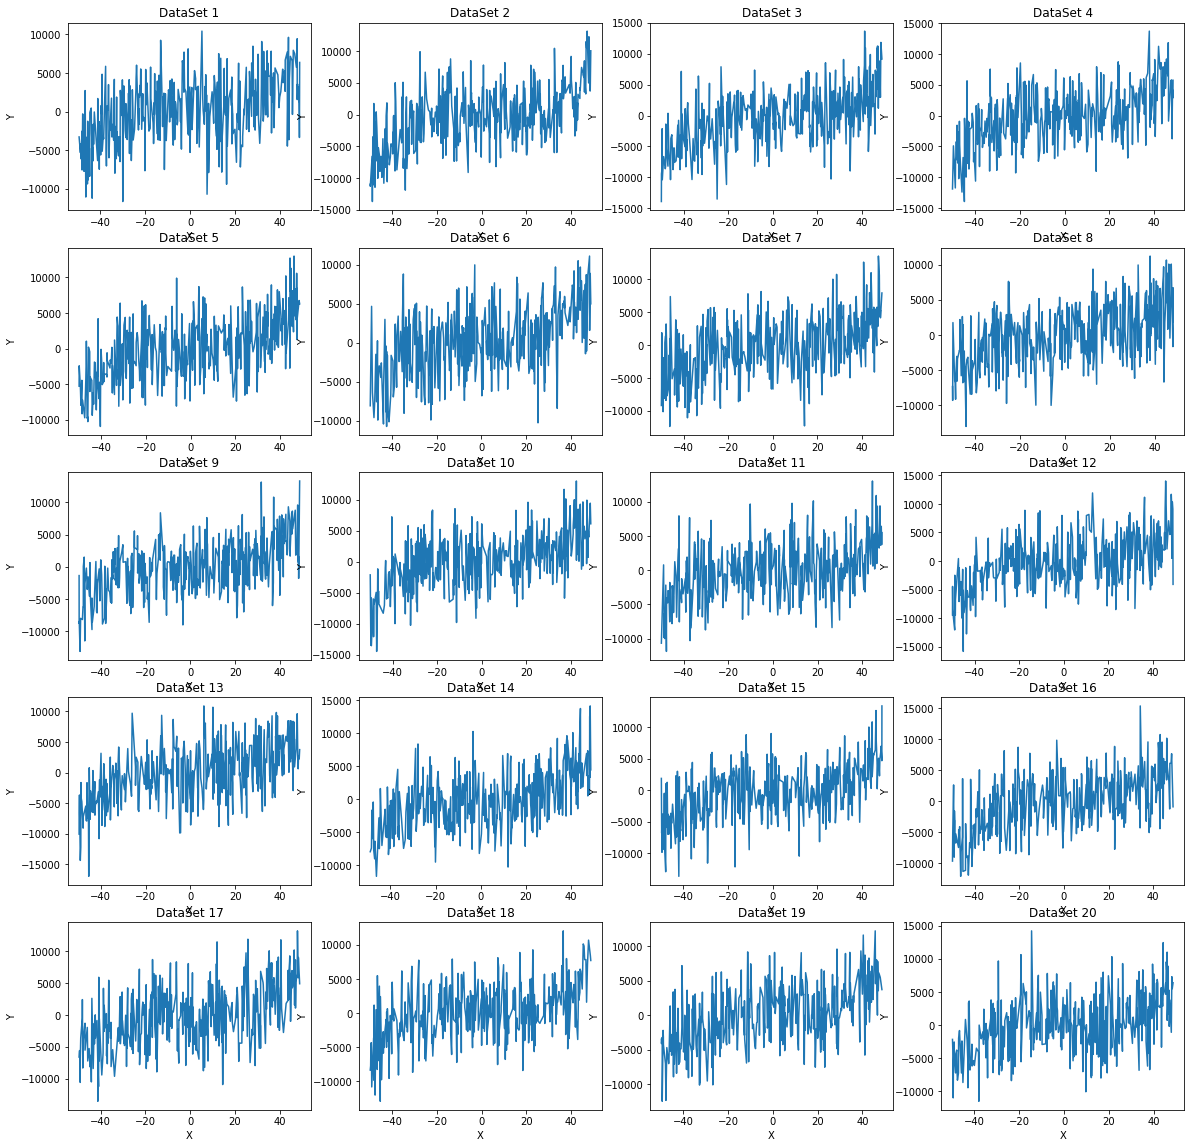

In [3]:
fig, ax = plt.subplots(5, 4, figsize=(20,20))
ax = ax.reshape(-1)
for i in range(20):
    sns.lineplot(xtrain[i], ytrain[i], ax=ax[i])
    ax[i].set_title('DataSet ' + str(i + 1))
    ax[i].set_xlabel('X')
    ax[i].set_ylabel('Y')

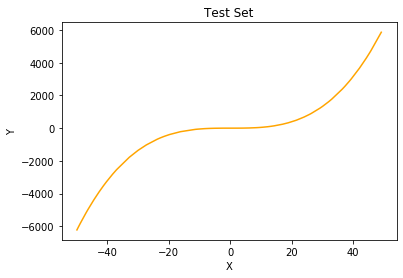

In [4]:
sns.lineplot(xtest, ytest, color='Orange')
plt.title('Test Set')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

The Test Data is remarkly simple to model, yet the training data is just full of noise. I believe that there is underlying signal that the model can learn, though it's not clear to me. Most **higher order models will overfit this data**, that is evident. Every Model beyond Order 3 will have high variance.

In [5]:
def k_poly(x: np.ndarray, k:int):
    return np.array([x ** i for i in range(k)]).T

In [6]:
model = [
    [linear_model.LinearRegression().fit(
            k_poly(xtrain[i], order),
            ytrain[i])
        for i in range(20) 
    ] for order in range(1, 10)
]

In [7]:
# Use model[order - 1][train_group]
def predict(x, group, order):
    assert 1 <= order <= 9 and 0 <= group < 20
    return model[order - 1][group].predict(k_poly(x, order))

predict(np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]), group=2, order=2)

array([ 597.19529672, 1462.14120011, 2327.0871035 , 3192.03300688,
       4056.97891027, 4921.92481366, 5786.87071704, 6651.81662043,
       7516.76252382, 8381.7084272 ])

In [8]:
import pandas as pd
data = {'x_test': xtest, 'y_test': ytest}
data.update({'g' + str(g) + '_o' + str(o): predict(xtest, g, o) 
             for o in range(1, 10) for g in range(20)})
res = pd.DataFrame(data)
res.head()

x_test       y_test       g0_o1       g1_o1      g2_o1       g3_o1  \
0  -21.47  -502.846044  172.115934 -295.486212  54.898088 -195.298503   
1  -37.11 -2581.477664  172.115934 -295.486212  54.898088 -195.298503   
2   -6.40   -12.862400  172.115934 -295.486212  54.898088 -195.298503   
3    3.61     3.055552  172.115934 -295.486212  54.898088 -195.298503   
4   25.77   843.144144  172.115934 -295.486212  54.898088 -195.298503   

        g4_o1       g5_o1       g6_o1      g7_o1  ...       g10_o9  \
0  130.823889  221.373367 -285.143315  74.509785  ...  -333.389085   
1  130.823889  221.373367 -285.143315  74.509785  ... -1641.092299   
2  130.823889  221.373367 -285.143315  74.509785  ...   238.143596   
3  130.823889  221.373367 -285.143315  74.509785  ...   256.042934   
4  130.823889  221.373367 -285.143315  74.509785  ...   276.655114   

        g11_o9       g12_o9       g13_o9       g14_o9       g15_o9  \
0    56.274412  -218.516301  -818.700074  -296.567996  -190.478802   
1 -2887.226049 -2969.368153 -2575.118622 -2993.146071 -3794.663104   
2  -241.705202  -260.559395  -744.796127   -92.355826   144.453771   
3     3.458716    84.929019  -740.143493  -326.755585   571.694127   
4   846.448314  1116.700914  1027.585054   292.597502   999.181765   

        g16_o9       g17_o9       g18_o9       g19_o9  
0  -413.194777  -223.125904  -703.640678  -289.987148  
1 -3235.604606 -1425.033189 -2887.281348 -2722.331260  
2  -130.127496   719.458849   901.813851   976.640329  
3  -648.350204   416.465908   726.411816    99.572471  
4  1054.439779   851.235641   634.307952   452.190180  

[5 rows x 182 columns]

In [9]:
def get_bias_variance(order):
    keys = ['g' + str(group) + '_o' + str(order) for group in range(20)]
    data = np.array([res[key].values for key in keys])
    variance = np.var(data, axis=0)
    bias = np.abs(np.mean(data, axis=0) - res['y_test'].values)
    return (np.mean(bias), np.mean(variance), np.sqrt(np.mean(bias ** 2)))

get_bias_variance(order=1)

(1716.3588857838863, 20935.166423224564, 2600.4458653365477)

## Analyzing Bias and Variance

We are plotting Bias and Variance for each model and against model size to see if the trends are satisfied.
We expect that:
* The Smaller Models will be High Bias and Low Variance since it has very little space to produce varying outputs, i.e. The function it learns will be simple. But bias is huge cause it didn't really learn a lot.
* The Bigger Models will be High Variance and Low Bias since it can overfit the data getting the mean almost perfectly equal, but have huge deviations due to learning too complex a function on different inputs.

In [10]:
bias_var_map = np.array([get_bias_variance(order) 
                         for order in range(1, 10)])
bias_map = np.array([x[0] for x in bias_var_map])
var_map = np.array([x[1] for x in bias_var_map])
bssq_map = np.array([x[2] for x in bias_var_map])
print('Bias:', bias_map, '\nVariance', var_map, '\nBias^2', bssq_map)

Bias: [1716.35888578  819.83786046  810.84021384   67.63398967   84.00189151
   79.18712742   80.09962645   84.97053521   85.57712158] 
Variance [ 20935.16642322  70545.48914575 125870.85554877 150073.73954647
 212235.70832552 276388.48029738 316863.50071853 357510.87596821
 404293.66486518] 
Bias^2 [2600.44586534  999.61412399  977.04619839   96.9006198   104.43825034
   96.63950685  101.23529961  101.66258248  100.73442981]


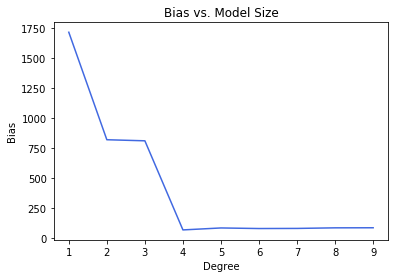

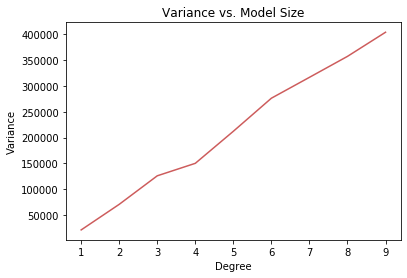

In [11]:
sns.lineplot(np.arange(1, 10), bias_map, color='RoyalBlue')
plt.ylabel('Bias')
plt.xlabel('Degree')
plt.title('Bias vs. Model Size')
plt.show()
sns.lineplot(np.arange(1, 10), var_map, color='IndianRed')
plt.ylabel('Variance')
plt.xlabel('Degree')
plt.title('Variance vs. Model Size')
plt.show()

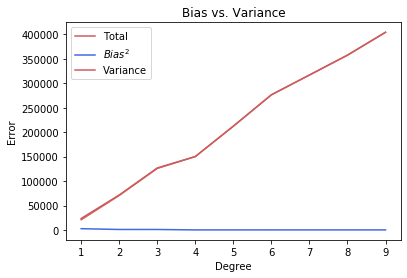

In [12]:
sns.lineplot(np.arange(1, 10), bssq_map + var_map, color='IndianRed')
sns.lineplot(np.arange(1, 10), bssq_map, color='RoyalBlue')
sns.lineplot(np.arange(1, 10), var_map, color='IndianRed')
plt.legend(['Total', '$Bias^2$', 'Variance'])
plt.ylabel('Error')
plt.xlabel('Degree')
plt.title('Bias vs. Variance')
plt.show()

## Check the Model's Predictions

One final run to see how the models, on average are fitting the data

Making Graphs: .........

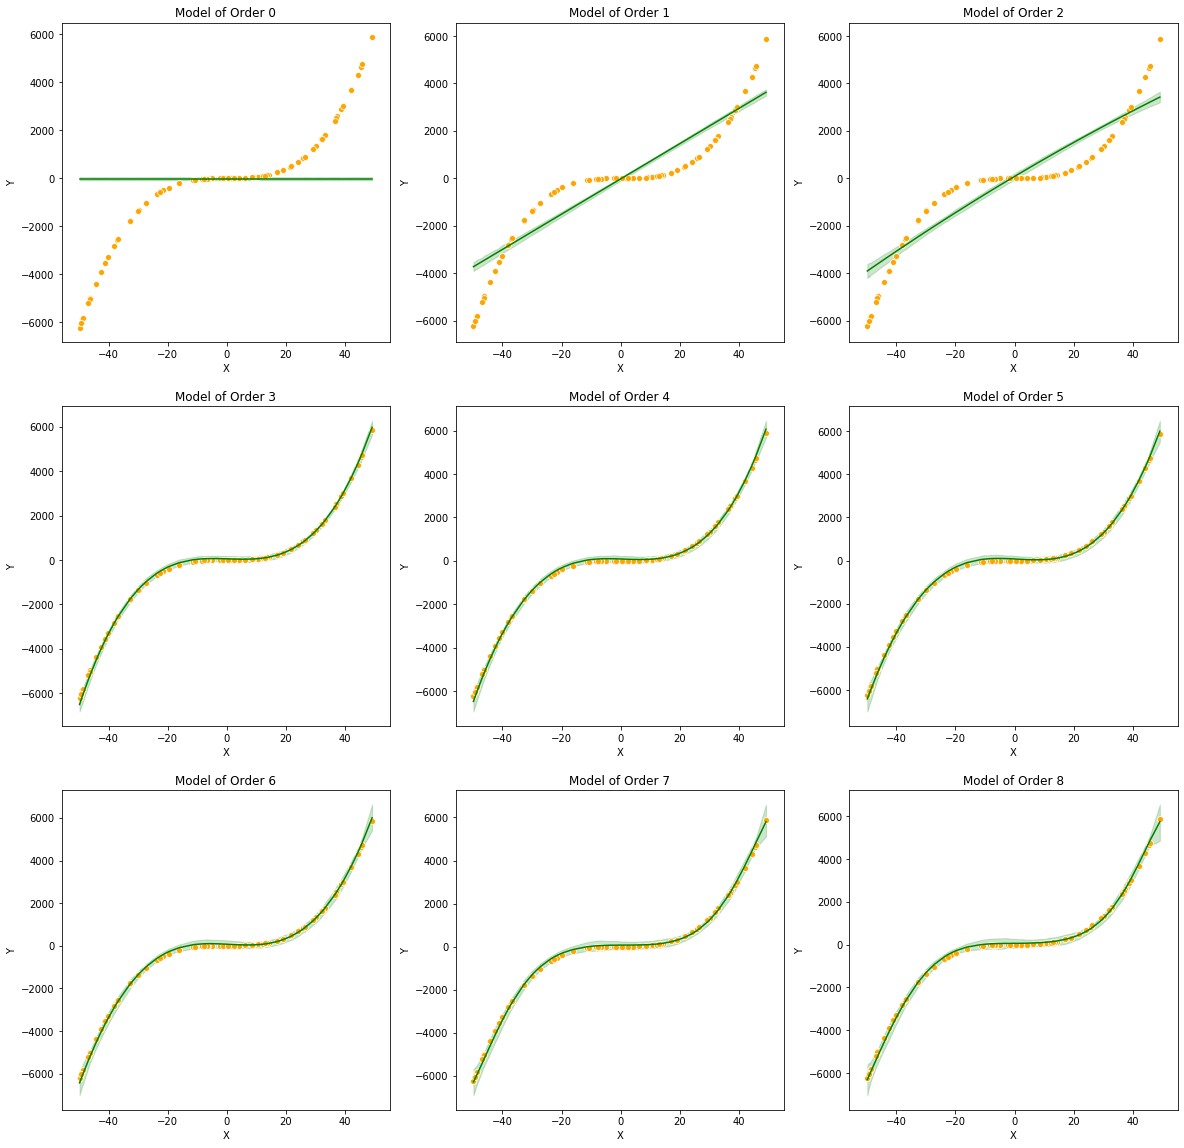

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(20,20))
ax = ax.reshape(-1)
print('Making Graphs: ', end='')
for order in range(1, 10):
    pred = np.array([model[order - 1][group].predict(k_poly(xtest, order)) 
                     for group in range(20)])
    ptest = np.mean(pred, axis=0)
    xfull, yfull = np.concatenate([xtest for i in range(20)]), pred.reshape(-1)
    print('.', end='')
    sns.lineplot(xfull, yfull, ax=ax[order-1], color='Green')
    sns.scatterplot(xtest, ytest, ax=ax[order-1], color='Orange')
    ax[order - 1].set_title('Model of Order ' + str(order - 1))
    ax[order - 1].set_xlabel('X')
    ax[order - 1].set_ylabel('Y')
plt.show()

## The Final Answers

Here the test set and the underlying structure of the data is of order 3. So our loss decreases till order 3 (actually till 4), then increases. Variance dominates later, Bias dominates first. So higher order models are (over 4) overfit and the lower orders models (below 3) are underfit.

Since the training set is very messy, we see higher order models gain variance pretty quickly. All data seems to be noise on the cubic form $y = x^3 / 32$.